In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

import os 
from wordcloud import WordCloud


ModuleNotFoundError: No module named 'wordcloud'

In [6]:
df = pd.read_csv('world_population.csv')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [8]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [12]:
df.shape

(234, 17)

In [15]:
df.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [18]:
print(f"Amount of duplicates: {df.duplicated().sum()}")


Amount of duplicates: 0


In [21]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [24]:
df.drop(['CCA3', 'Capital'], axis=1, inplace=True)

In [27]:
df.head()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [30]:
df.tail()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,Zimbabwe,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [33]:
df.head(10).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.058700,1.025700,0.520000
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.870200,0.995700,0.040000
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.853100,1.016400,0.560000
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.477400,0.983100,0.000000
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.564100,1.010000,0.000000
5,42,Angola,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.546600,1.031500,0.450000
6,224,Anguilla,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.252700,1.006600,0.000000
7,201,Antigua and Barbuda,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.133500,1.005800,0.000000
8,33,Argentina,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.368300,1.005200,0.570000
9,140,Armenia,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.483100,0.996200,0.030000


In [36]:
df.describe().T.sort_values(ascending=0, by="mean").style.background_gradient(cmap = "BuGn")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


In [39]:
df.nunique()


Rank                           234
Country/Territory              234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

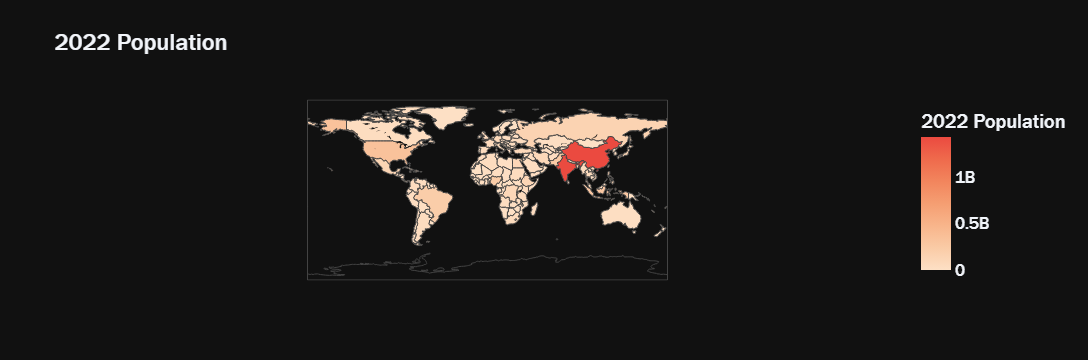

In [42]:
fig1 = px.choropleth(df,
                     locations='Country/Territory',
                     locationmode='country names',
                     color='2022 Population',
                     color_continuous_scale=px.colors.sequential.Peach,
                     template='plotly_dark',
                     title = '2022 Population')

fig1.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig1.show()

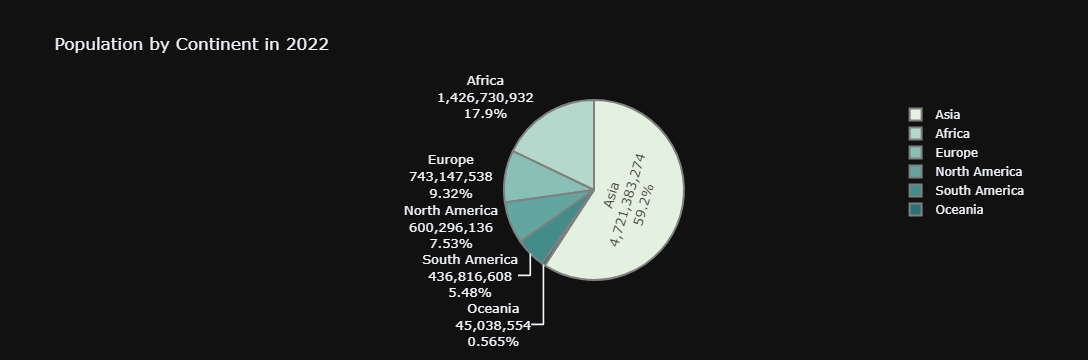

In [44]:
population2022=df.groupby(by='Continent')['2022 Population'].sum()
fig=px.pie(values=population2022.values,
          names=population2022.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Population by Continent in 2022',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()


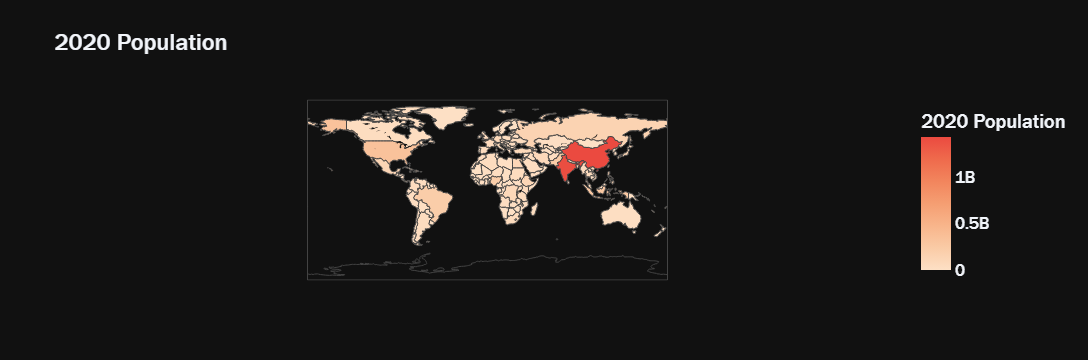

In [46]:
fig2 = px.choropleth(df,
                     locations='Country/Territory',
                     locationmode='country names',
                     color='2020 Population',
                     color_continuous_scale=px.colors.sequential.Peach,
                     template='plotly_dark',
                     title = '2020 Population')
fig2.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig2.show()

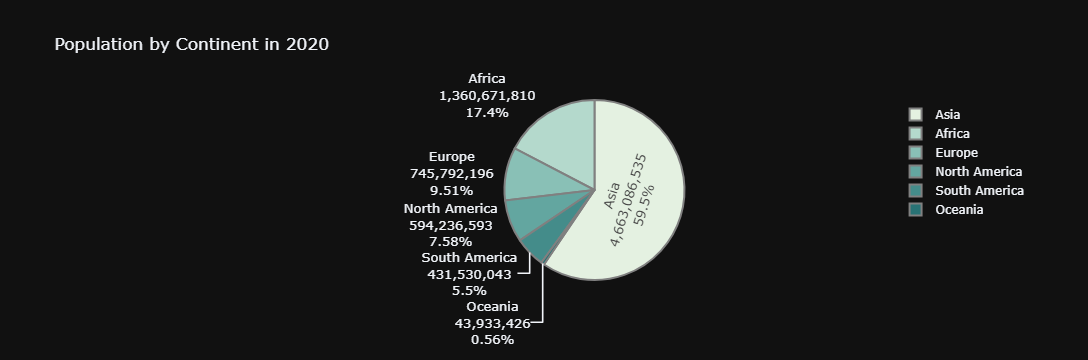

In [48]:
population2020=df.groupby(by='Continent')['2020 Population'].sum()
fig=px.pie(values=population2020.values,
          names=population2020.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Population by Continent in 2020',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

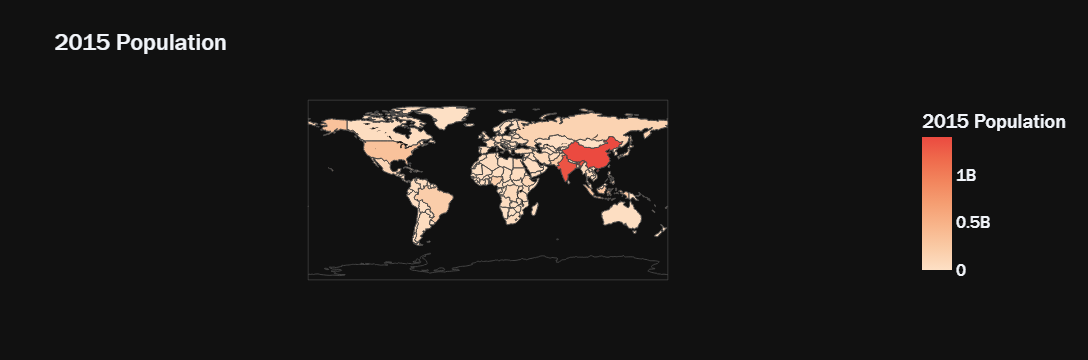

In [50]:
fig3 = px.choropleth(df,
                     locations='Country/Territory',
                     locationmode='country names',
                     color='2015 Population',
                     color_continuous_scale=px.colors.sequential.Peach,
                     template='plotly_dark',
                     title = '2015 Population')
fig3.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig3.show()

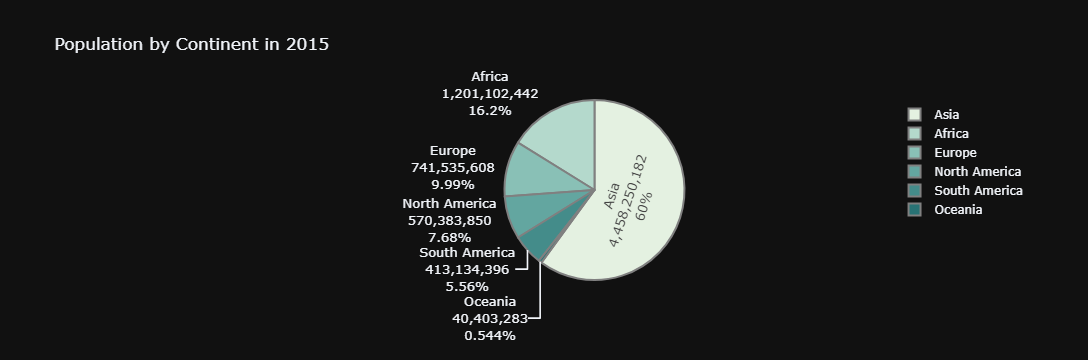

In [52]:
population2015=df.groupby(by='Continent')['2015 Population'].sum()
fig=px.pie(values=population2015.values,
          names=population2015.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Population by Continent in 2015',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

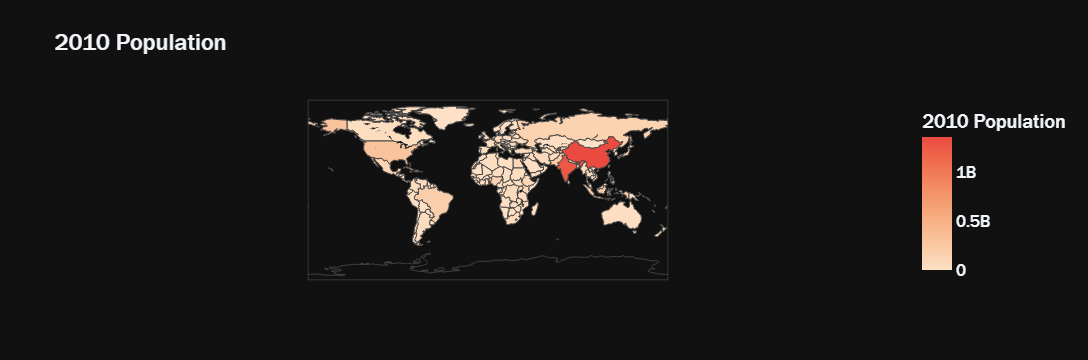

In [54]:
fig4 = px.choropleth(df,
                     locations='Country/Territory',
                     locationmode='country names',
                     color='2010 Population',
                     color_continuous_scale=px.colors.sequential.Peach,
                     template='plotly_dark',
                     title = '2010 Population')
fig4.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig4.show()


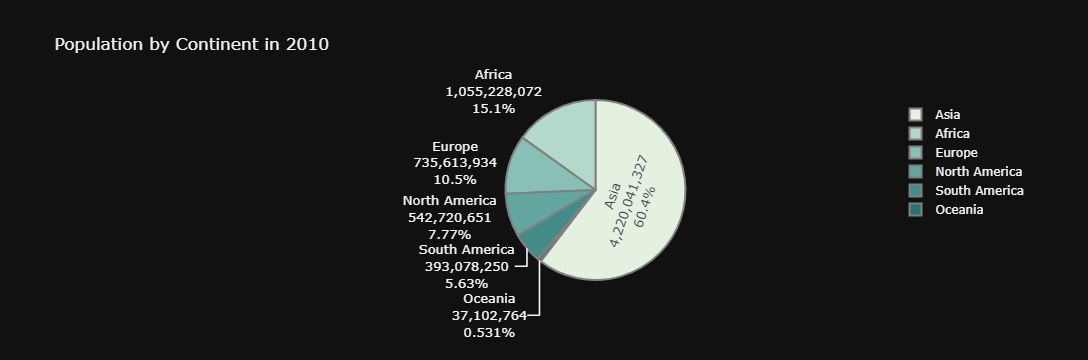

In [56]:
population2010=df.groupby(by='Continent')['2010 Population'].sum()
fig=px.pie(values=population2010.values,
          names=population2010.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Population by Continent in 2010',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

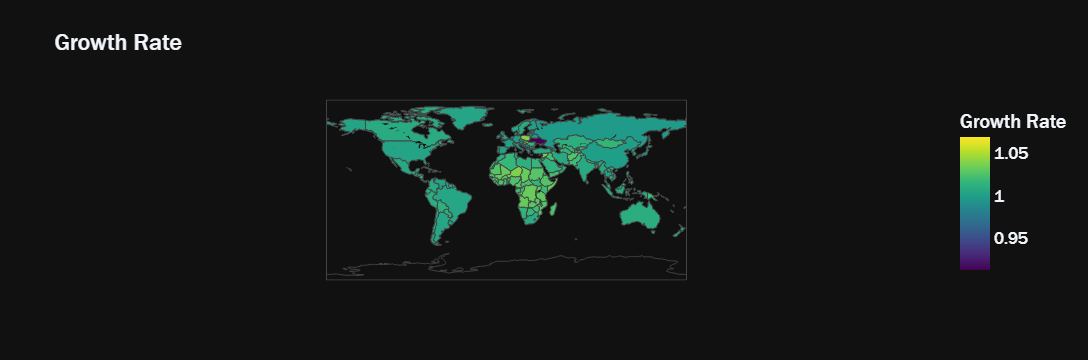

In [58]:
#Growth Rate
fig = px.choropleth(df,
                     locations='Country/Territory',
                     locationmode='country names',
                     color='Growth Rate',
                     color_continuous_scale='Viridis',
                     template='plotly_dark',
                     title = 'Growth Rate')


fig.update_layout(font = dict(size = 17, family="Franklin Gothic"))

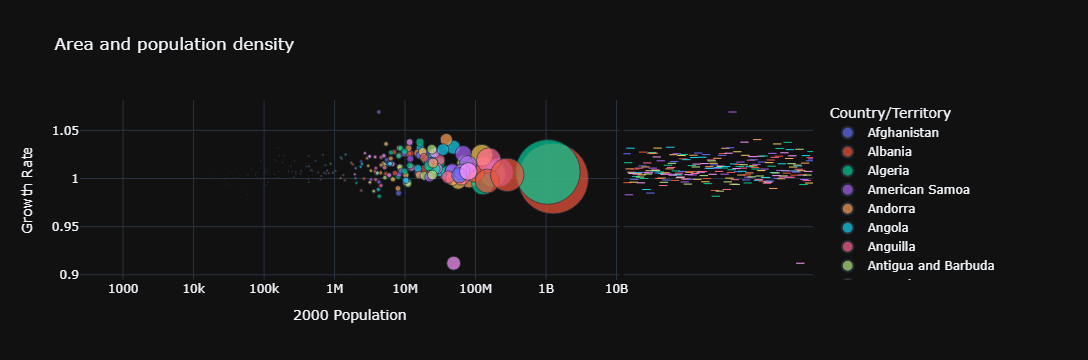

In [60]:
fig = px.scatter(df, x="2000 Population", y="Growth Rate",
                 size="2000 Population", color="Country/Territory",
                 log_x=True, size_max=50,
                 template='plotly_dark',
                 title="Area and population density",
                 marginal_y='rug')
fig.show()

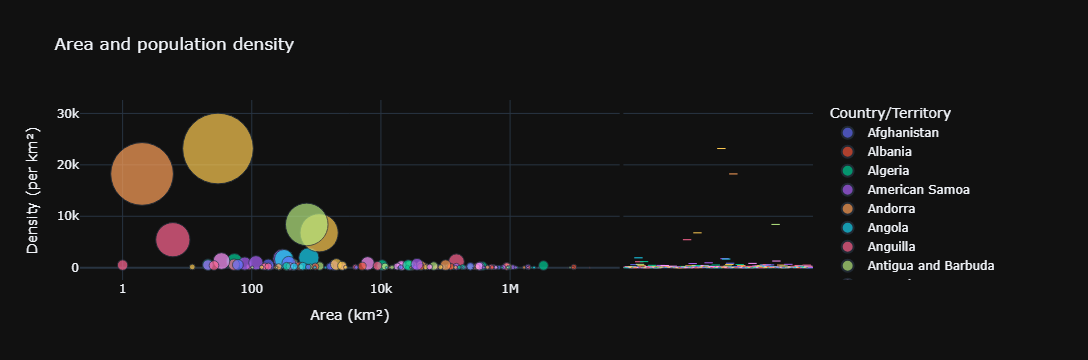

In [62]:
fig = px.scatter(df, x="Area (km²)", y="Density (per km²)",
                 size="Density (per km²)", color="Country/Territory",
                 log_x=True, size_max=50,
                 template='plotly_dark',
                 title="Area and population density",
                 marginal_y='rug')
fig.show()

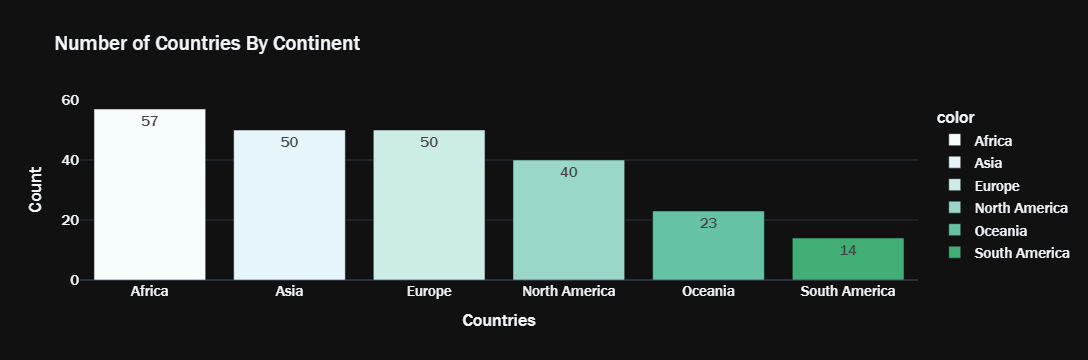

In [66]:
country=df['Continent'].value_counts()
fig=px.bar(x=country.index,
          y=country.values,
          color=country.index,
          color_discrete_sequence=px.colors.sequential.BuGn,
          text=country.values,
          title= 'Number of Countries By Continent',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Countries",
                 yaxis_title="Count",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()

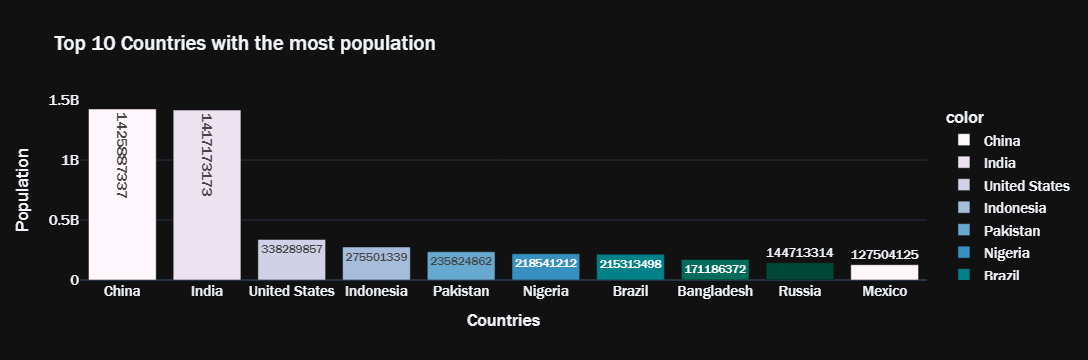

In [70]:

top_most_population = df.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(10)

fig=px.bar(x=top_most_population.index,
          y=top_most_population.values,
          color=top_most_population.index,
          color_discrete_sequence=px.colors.sequential.PuBuGn,
          text=top_most_population.values,
          title="Top 10 Countries with the most population",
          template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

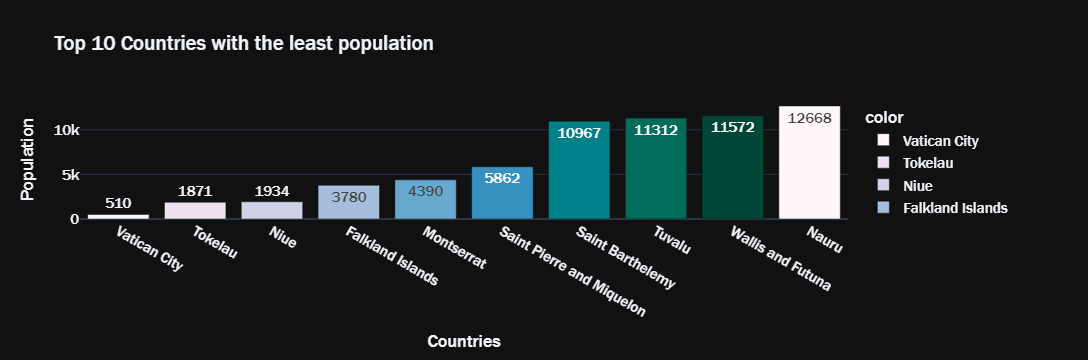

In [72]:
top_least_population = df.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=True).head(10)
fig=px.bar(x=top_least_population.index,
          y=top_least_population.values,
          color=top_least_population.index,
          color_discrete_sequence=px.colors.sequential.PuBuGn,
          text=top_least_population.values,
          title="Top 10 Countries with the least population",
          template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.shoow()

In [74]:
# Filter out only numeric columns
numeric_features = df.select_dtypes(include='number').columns
# Group by 'Continent' and calculate the mean of numeric features
continent = df.groupby('Continent')[numeric_features].mean()
# Sort the resulting DataFrame by '2022 Population'
continent.sort_values(by='2022 Population', inplace=True)


In [76]:
population_features = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']

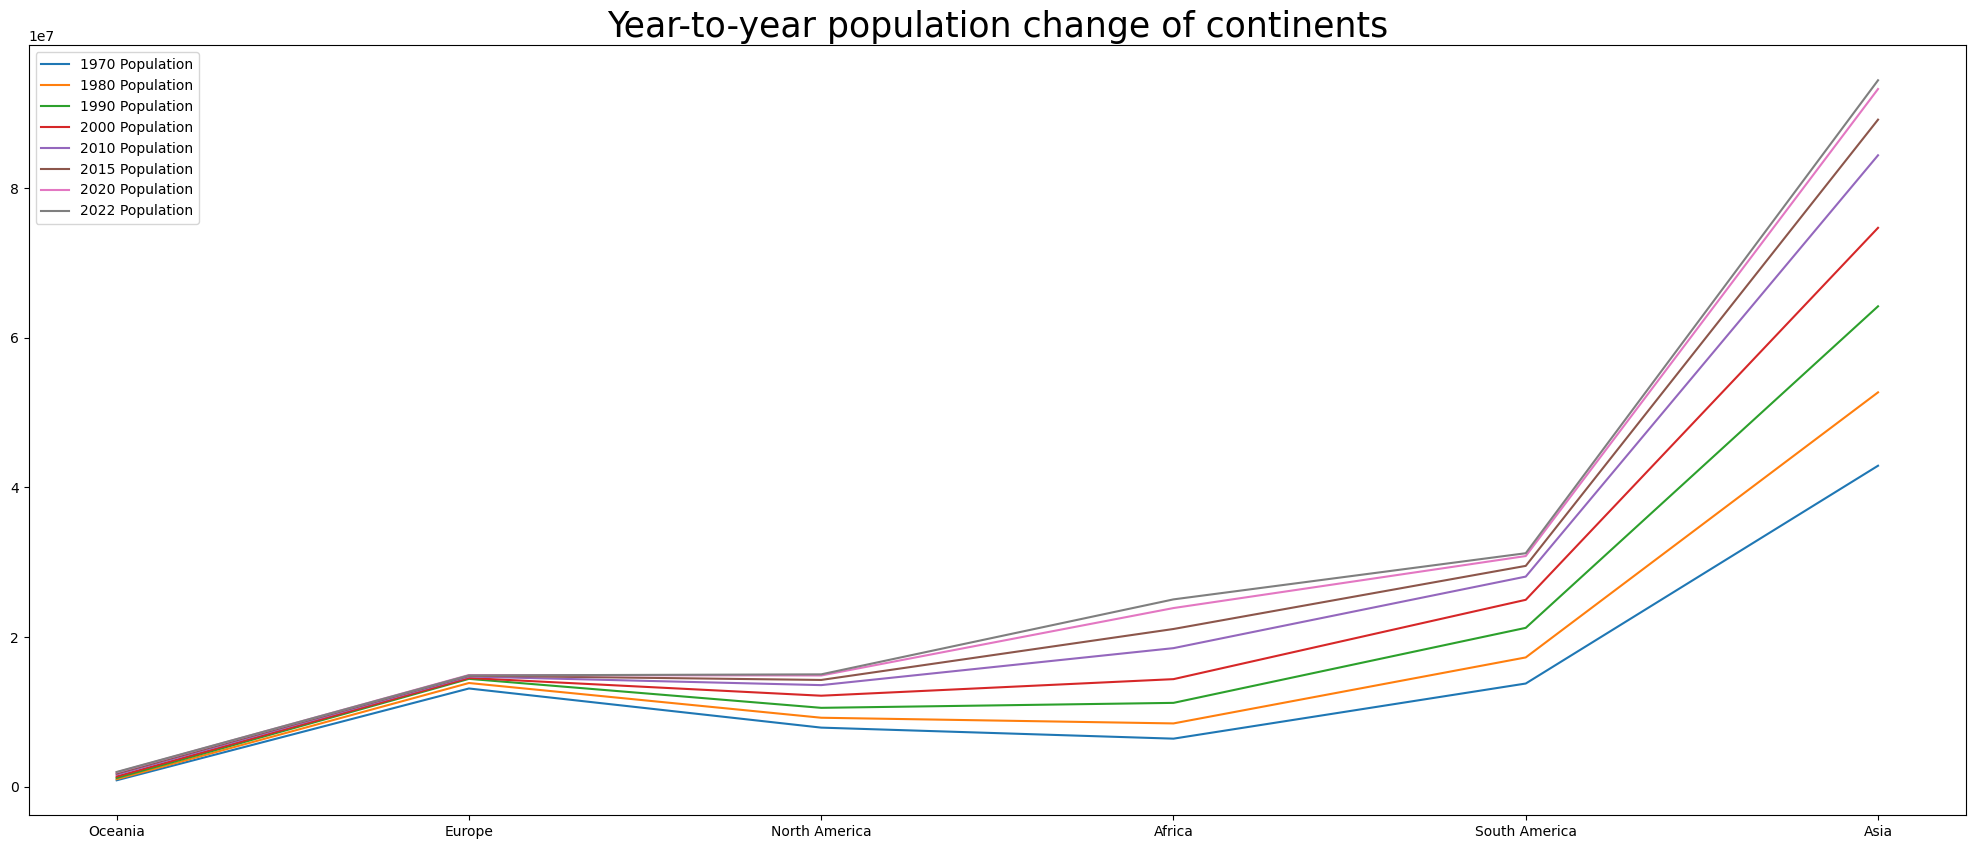

In [78]:
population_features.reverse()
plt.figure(figsize=(25,10))
for feature in population_features:
    plt.plot(continent[feature],label = feature)
plt.legend()
plt.title('Year-to-year population change of continents', size=25);
plt.show();

In [ ]:
text = " ".join(subject_titles for subject_titles in df["Country/Territory"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'PuRd', min_font_size = 8).generate(text)
plt.figure(figsize = (20, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()